In [1]:
import math
import numpy as np

In [2]:
import pickle
dbfile = open('extracted_dataset', 'rb')
# source, destination
dataset = pickle.load(dbfile)                     
dbfile.close()

In [3]:
X=np.array(dataset['features'].tolist())
y=np.array(dataset['class'].tolist())

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
results = []
for k in range(6,51,2):
    classifier= KNeighborsClassifier(n_neighbors=k, metric='euclidean')  
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    results.append(accuracy)

In [7]:
print(results)

[0.555, 0.565, 0.58, 0.545, 0.53, 0.525, 0.515, 0.515, 0.5, 0.51, 0.52, 0.515, 0.51, 0.51, 0.505, 0.525, 0.52, 0.52, 0.51, 0.51, 0.515, 0.495, 0.5]


In [8]:
import matplotlib.pyplot as plt
plt.plot(list(range(6,51,2)),results)
plt.title('Variation for euclidean ')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
classifier= KNeighborsClassifier(n_neighbors=10, metric='euclidean')  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
print(classification_report(y_test,y_pred))

[[10  0  1  1  0  1  2  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 2  3  8  5  0  5  1  0  1  2]
 [ 0  0  2 15  2  0  0  0  1  2]
 [ 0  0  0  3 13  2  1  0  4  0]
 [ 1  4  0  2  0  8  0  0  1  2]
 [ 0  0  0  0  1  0 18  0  1  0]
 [ 0  0  1  2  1  0  0 19  1  0]
 [ 0  2  0  2  3  0  0  0  8  0]
 [ 1  1  1  7  0  4  3  0  2  6]]
              precision    recall  f1-score   support

           1       0.71      0.67      0.69        15
           2       0.52      1.00      0.69        11
           3       0.62      0.30      0.40        27
           4       0.41      0.68      0.51        22
           5       0.65      0.57      0.60        23
           6       0.40      0.44      0.42        18
           7       0.72      0.90      0.80        20
           8       1.00      0.79      0.88        24
           9       0.42      0.53      0.47        15
          10       0.50      0.24      0.32        25

    accuracy                           0.58       200
   macro avg       

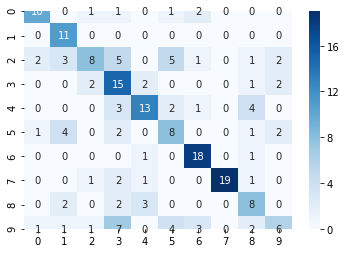

In [11]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True ,cmap='Blues')

In [12]:
results = []
for k in range(6,51,2):
    classifier= KNeighborsClassifier(n_neighbors=k, metric='manhattan')  
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    results.append(accuracy)

In [13]:
print(results)

[0.51, 0.51, 0.51, 0.52, 0.525, 0.525, 0.49, 0.51, 0.525, 0.52, 0.52, 0.49, 0.49, 0.515, 0.53, 0.54, 0.54, 0.54, 0.52, 0.5, 0.5, 0.51, 0.515]


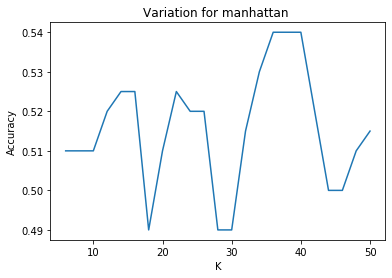

In [14]:
import matplotlib.pyplot as plt
plt.plot(list(range(6,51,2)),results)
plt.title('Variation for manhattan ')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [15]:
classifier= KNeighborsClassifier(n_neighbors=36, metric='manhattan')  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [16]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
print(classification_report(y_test,y_pred))

[[ 7  1  1  0  0  0  4  0  2  0]
 [ 0 10  0  0  0  1  0  0  0  0]
 [ 1  3  6  5  0  6  0  3  1  2]
 [ 0  0  0 15  0  0  2  1  2  2]
 [ 0  0  1  3 10  0  2  1  6  0]
 [ 1  5  0  3  3  4  0  0  1  1]
 [ 0  0  0  0  1  0 18  0  0  1]
 [ 0  0  0  0  3  0  0 20  1  0]
 [ 0  1  0  0  2  1  0  3  8  0]
 [ 0  1  0  9  0  2  1  0  2 10]]
              precision    recall  f1-score   support

           1       0.78      0.47      0.58        15
           2       0.48      0.91      0.62        11
           3       0.75      0.22      0.34        27
           4       0.43      0.68      0.53        22
           5       0.53      0.43      0.48        23
           6       0.29      0.22      0.25        18
           7       0.67      0.90      0.77        20
           8       0.71      0.83      0.77        24
           9       0.35      0.53      0.42        15
          10       0.62      0.40      0.49        25

    accuracy                           0.54       200
   macro avg       

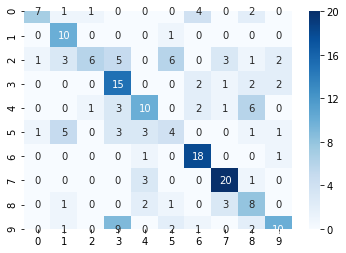

In [17]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True ,cmap='Blues')

In [18]:
results = []
for k in range(6,51,2):
    classifier= KNeighborsClassifier(n_neighbors=k, metric='chebyshev')  
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    results.append(accuracy)

In [19]:
print(results)

[0.515, 0.51, 0.495, 0.505, 0.48, 0.49, 0.475, 0.5, 0.5, 0.5, 0.495, 0.47, 0.455, 0.45, 0.475, 0.465, 0.465, 0.455, 0.455, 0.455, 0.47, 0.445, 0.445]


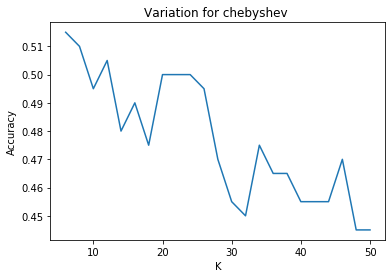

In [20]:
import matplotlib.pyplot as plt
plt.plot(list(range(6,51,2)),results)
plt.title('Variation for chebyshev ')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [21]:
classifier= KNeighborsClassifier(n_neighbors=6, metric='chebyshev')  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [22]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
print(classification_report(y_test,y_pred))

[[ 9  0  0  4  0  1  1  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 6  2  8  7  0  3  0  0  0  1]
 [ 0  0  3 14  0  1  3  0  0  1]
 [ 0  0  0  6  8  1  4  1  3  0]
 [ 1  5  0  2  0  7  0  1  1  1]
 [ 0  0  0  0  1  0 18  0  1  0]
 [ 0  0  1  3  1  1  0 18  0  0]
 [ 0  2  1  3  4  0  1  0  4  0]
 [ 4  0  1  7  1  2  3  0  1  6]]
              precision    recall  f1-score   support

           1       0.45      0.60      0.51        15
           2       0.55      1.00      0.71        11
           3       0.57      0.30      0.39        27
           4       0.30      0.64      0.41        22
           5       0.53      0.35      0.42        23
           6       0.44      0.39      0.41        18
           7       0.60      0.90      0.72        20
           8       0.90      0.75      0.82        24
           9       0.40      0.27      0.32        15
          10       0.67      0.24      0.35        25

    accuracy                           0.52       200
   macro avg       

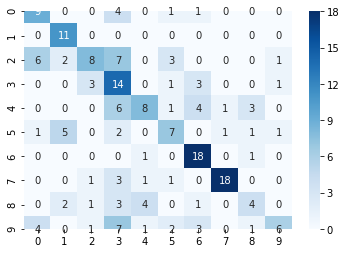

In [23]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True ,cmap='Blues')

In [24]:
results = []
for c in range(2,6):
    r = []
    for k in range(6,51,2):
        classifier= KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=c)  
        classifier.fit(X_train, y_train)
        y_pred= classifier.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        r.append(accuracy)
    results.append(r)

In [25]:
print(results)

[[0.555, 0.565, 0.58, 0.545, 0.53, 0.525, 0.515, 0.515, 0.5, 0.51, 0.52, 0.515, 0.51, 0.51, 0.505, 0.525, 0.52, 0.52, 0.51, 0.51, 0.515, 0.495, 0.5], [0.52, 0.555, 0.53, 0.52, 0.52, 0.535, 0.53, 0.51, 0.515, 0.52, 0.54, 0.52, 0.52, 0.5, 0.5, 0.52, 0.51, 0.5, 0.495, 0.49, 0.49, 0.485, 0.49], [0.54, 0.505, 0.515, 0.535, 0.535, 0.54, 0.535, 0.525, 0.505, 0.525, 0.52, 0.525, 0.515, 0.515, 0.52, 0.515, 0.5, 0.485, 0.475, 0.47, 0.475, 0.49, 0.49], [0.53, 0.52, 0.525, 0.52, 0.515, 0.505, 0.52, 0.525, 0.51, 0.51, 0.505, 0.51, 0.52, 0.525, 0.515, 0.515, 0.48, 0.485, 0.475, 0.48, 0.475, 0.47, 0.48]]


In [26]:
m = 0
for row in results:
    t = m
    m = max(m,max(row))
    if t!=m:
        i = results.index(row)

print(m,i)
    

0.58 0


In [27]:
print(results[0].index(0.58))

2


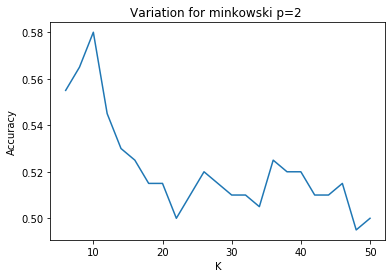

In [28]:
import matplotlib.pyplot as plt
plt.plot(list(range(6,51,2)),results[0])
plt.title('Variation for minkowski p=2 ')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [29]:
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [30]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
print(classification_report(y_test,y_pred))

[[10  0  1  1  0  1  2  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 2  3  8  5  0  5  1  0  1  2]
 [ 0  0  2 15  2  0  0  0  1  2]
 [ 0  0  0  3 13  2  1  0  4  0]
 [ 1  4  0  2  0  8  0  0  1  2]
 [ 0  0  0  0  1  0 18  0  1  0]
 [ 0  0  1  2  1  0  0 19  1  0]
 [ 0  2  0  2  3  0  0  0  8  0]
 [ 1  1  1  7  0  4  3  0  2  6]]
              precision    recall  f1-score   support

           1       0.71      0.67      0.69        15
           2       0.52      1.00      0.69        11
           3       0.62      0.30      0.40        27
           4       0.41      0.68      0.51        22
           5       0.65      0.57      0.60        23
           6       0.40      0.44      0.42        18
           7       0.72      0.90      0.80        20
           8       1.00      0.79      0.88        24
           9       0.42      0.53      0.47        15
          10       0.50      0.24      0.32        25

    accuracy                           0.58       200
   macro avg       

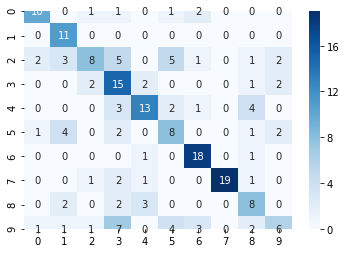

In [31]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True ,cmap='Blues')